# GGIS 407 Project: Renewable Energy Viability

Climate change is one of the greatest threats that humanity will face in the 21st century and beyond. A great deal of effort has been expended to document and forecast exactly how and when the damage will occur, but these analyses do not create climate solutions. A variety of low carbon emissions energy sources exist, such as wind, solar, geothermal, nuclear, and hydropower. All of these will play a role in the coming decades to create a piecemeal solution to replace fossil fuels. However, these energy sources are all bring with them their own constraints:
- Wind power density varies by region. This directly impacts the profitability and therefore return on investment for wind turbine installations.
- Yearly average insolation varies by region. This directly drives the the profitability and therefore return on investment on a photovoltaic project.
- Economic viability varies by region -- areas with high electricity prices create favorable conditions for renewable energy sources to compete with other energy sources in the area.
- The opportunity cost of space-hungry solar panel installations varies geographically -- for example, the value of a solar array on a plot of land in western Kanasas may outcompete its value as a cattle pasture, but that same solar array would not outcompete the value of suburban development near Kansas City.

There are many other factors to consider that are outside the scope of this project that would make the analysis conducted in this project more accurate. They are listed below:
- Other green energy technologies, such as nuclear, geothermal, and hydroelectric plants are not considered in this analysis.
- The cost of grid-scale energy storage as an off-peak energy source (e.g. windless evenings) is not accounted for.
- The variability of financial risk by region due to natural disasters such as floods, earthquakes, and storms is not accounted for.
- Varying cost of labor by region is not accounted for.
- Cost of shipping, and its effect on the overall cost of renewable energy projects, is not accounted for.
- The economic efficiency of multiple uses of land, such as photovoltaics on roofs, will not be considered. This is based on the assumption that rooftop solar cannot realistically account for a significant fraction of solar energy production.

Data description and sources:
- Wind
    - Data used will be Wind Gross Capacity Factor (GCF) at 110 meters. GCF is the ratio of actual energy output to theoretical maximum energy output of a given installation. Higher percentages
    - Source: National Renewable Energy Laboratory
- Solar
    - Data used will be Global Horizontal Irradiance (GHI), a measure of the amount of irradiance received by a given horizontal area of ground.
    - Source: National Renewable Energy Laboratory
- Electricity prices by state
    - Source: U.S. Energy Information Administration
- Property values
    - Land value data will be measured in $/ha.
    - Source: Nolte, Christoph (2020), Data for: High-resolution land value maps reveal underestimation of conservation costs in the United States, Dryad, Dataset, https://doi.org/10.5061/dryad.np5hqbzq9

Project goals:
- Produce a choropleth map with a single, simplified score describing each region's overall renewable energy potential. The resolution of this map will be driven by the resolution of the raster data available. There are multiple ways to calculate such a score, so careful documentation of the process will be necessary.
- Produce a map that describes which form of renewable energy would be most profitable for each region of the US under the assumptions of this project.
- Generate a high level overview of the notable observations from the above two maps.

# Preliminary Map Generation

In [81]:
%matplotlib inline
import geopandas
import pandas
import os
import matplotlib
import shapely
import rasterio
from rasterio.plot import show
import random

### Land Value Data Across the Conterminous United States

In [ ]:
# file = 'USA_power-density_100m.geojson' # this file is just the outline of the us, no wind power data.
# os.path.exists(file)
# open(file)
# data = geopandas.read_file(file)
# data

In [ ]:
# ax = data.plot(figsize=(20, 20), color='white', edgecolor='black', legend=True)
# type(ax)

In [2]:
land_value = rasterio.open('land_values_epsg4326.tif')
# upperLeft = dataset.transform * (0, 0)
# lowerRight = dataset.transform * (dataset.width, dataset.height)
# lowerRight
# land_value.crs
type(land_value)

rasterio.io.DatasetReader

In [5]:
print("the raster has " + str(land_value.height * land_value.width) + " values")
# dataset.bounds

the raster has 66260144 values


In [3]:
band1 = land_value.read(1)
band1

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]], dtype=float32)

In [5]:
# regular indexing allows me to access land values from any cell
band1[land_value.height // 4, land_value.width // 10 * 9]

8.246131

In [37]:
# spatial indexing -- lat and long in gives me regular indices out
# x, y = (land_value.bounds.left + 10, land_value.bounds.top - 5)
# row, col = land_value.index(x, y)
# band1[row, col]

In [5]:
# get spatial coordinates of a pixel as (x, y) coords:
lonlat = land_value.xy(land_value.height, land_value.width)
lonlat

(-65.32360922558433, 22.857174425967067)

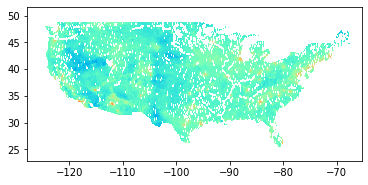

<AxesSubplot:>

In [41]:
show(land_value, cmap='rainbow')

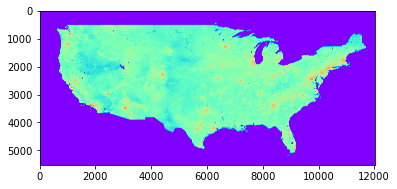

<AxesSubplot:>

In [42]:
show(band1, cmap='rainbow')

In [44]:
# the following code was used to reproject raster data from epsg 5070 to 4326
# import rioxarray
# rds = rioxarray.open_rasterio('places_fmv_all.tif')
# rds_4326 = rds.rio.reproject("EPSG:4326")
# rds_4326.rio.to_raster("file.tif")

In [14]:
# Next, we convert the land value data into a geodataframe so it can be compared / analyzed with the other datasets.
landDict = {'land_value':[], 'geometry':[]}
counter = 0
for y in range(land_value.height):
    for x in range(land_value.width):
        lv = band1[y, x] # get the land value at that location
        # there is far too much data, so we extract 1% of it:
        if random.randint(0,99) == 0 and lv != 0: # only add to the table if land value isn't zero, since null values default to zero for this dataset
            landDict['land_value'].append(lv) # add it to the dictionary
            lonlat = land_value.xy(y, x) # what is generated is a 2 item tuple in this order: lon, then lat
            # landDict['latitude'].append(lonlat[1])
            # landDict['longitude'].append(lonlat[0])
            landDict['geometry'].append(shapely.geometry.Point(lonlat))
        counter += 1
        if counter % 1000000 == 0:
            print(counter) # visualize how far along it has come

1000000
2000000
3000000
4000000
5000000
6000000
7000000
8000000
9000000
10000000
11000000
12000000
13000000
14000000
15000000
16000000
17000000
18000000
19000000
20000000
21000000
22000000
23000000
24000000
25000000
26000000
27000000
28000000
29000000
30000000
31000000
32000000
33000000
34000000
35000000
36000000
37000000
38000000
39000000
40000000
41000000
42000000
43000000
44000000
45000000
46000000
47000000
48000000
49000000
50000000
51000000
52000000
53000000
54000000
55000000
56000000
57000000
58000000
59000000
60000000
61000000
62000000
63000000
64000000
65000000
66000000


In [15]:
landValueGdf = geopandas.GeoDataFrame(landDict, crs="EPSG:4326")

In [12]:
landValueGdf

land_value                     geometry
0        9.005161   POINT (-94.93061 49.29033)
1        8.016808   POINT (-94.98794 49.26427)
2        7.363946   POINT (-96.56705 49.00369)
3        8.578009  POINT (-120.12862 48.99848)
4        7.715559  POINT (-106.20848 48.99848)
...           ...                          ...
29723    8.782399   POINT (-80.49974 25.25971)
29724   10.099209   POINT (-81.01569 25.22844)
29725    8.782522   POINT (-80.64566 25.22844)
29726   10.231956   POINT (-80.85413 25.20760)
29727    9.821819   POINT (-81.45867 24.78025)

[29728 rows x 2 columns]

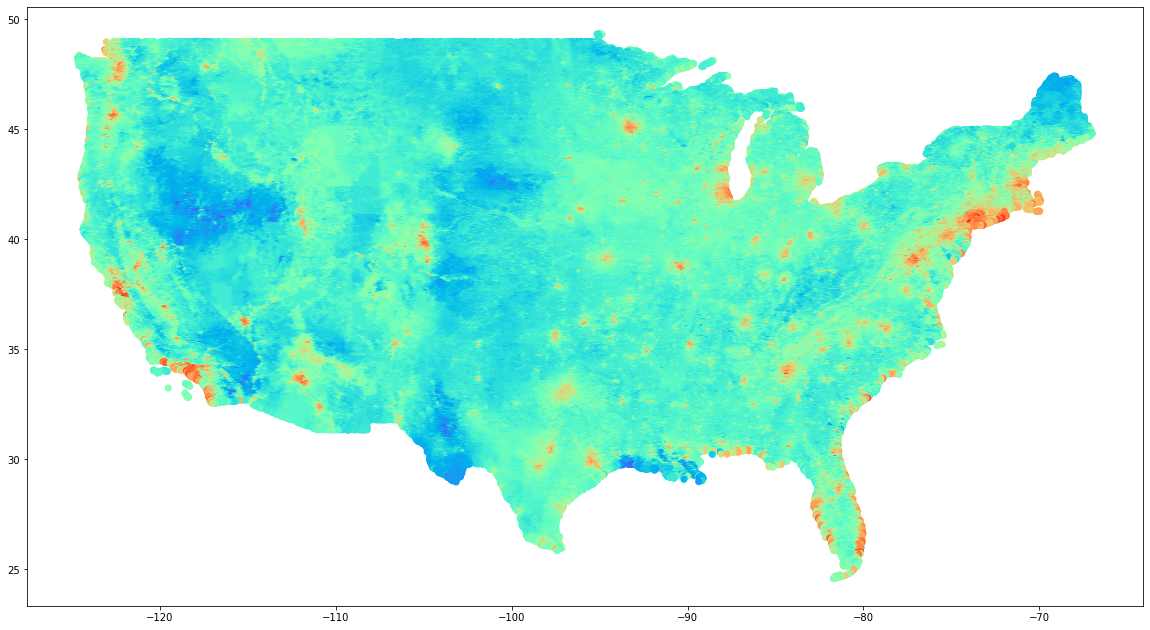

In [79]:
landValueGdf.plot(figsize=(20, 20), column='land_value', cmap='rainbow')
landValueGdf.to_file('land_values_trimmed')

In [86]:
# to avoid having to regenerate the map above each day, this line can be used to pull it from file.
landValueGdf = geopandas.read_file('land_values_trimmed/land_values_trimmed.shp')

###  Insolation Across the Conterminous United States (Global Horizontal Irradiance)

In [121]:
pv_data_path = 'pv_open_2020.csv'
gdf = geopandas.read_file(pv_data_path, crs='EPSG:4326')
gdf

sc_gid capacity_factor global_horizontal_irradiance  capacity_mw  \
0          0     0.139176667                  3.354820967  591.4528875   
1          1     0.137450948                  3.306945562  596.6472656   
2          2     0.136000022                  3.292999983       2.8512   
3          3     0.141827255                  3.417381763  2014.383178   
4          4      0.13782908                  3.327923536  3557.400778   
...      ...             ...                          ...          ...   
55514  55530     0.206913486                  5.196184158       965.52   
55515  55531     0.205764785                  5.174337864  238.6791404   
55516  55532     0.207999989                   5.20800066  25.09315137   
55517  55533     0.207652241                   5.20336771     330.0912   
55518  55534     0.208622813                  5.229780674  792.0788766   

        area_sq_km latitude longitude distance_to_transmission_km geometry  
0      18.48290273   48.994  -122.735                 0.673353738     None  
1      18.64522705   49.022  -122.575                 6.875389424     None  
2           0.0891   49.049  -122.414                 7.901461097     None  
3      62.94947432     48.9  -122.688                 2.910129499     None  
4      111.1687743   48.927  -122.529                 102.9264234     None  
...            ...      ...       ...                         ...      ...  
55514      30.1725   25.982   -97.349                 22.58646381     None  
55515  7.458723138   25.983   -97.231                  9.37474049     None  
55516   0.78416098   25.877   -97.583                 4.844145594     None  
55517     10.31535   25.879   -97.465                 5.204726337     None  
55518  24.75246489    25.88   -97.347                 11.19322723     None  

[55519 rows x 9 columns]

In [122]:
# by default, the downloaded csv does not contain geometry values. The code below generates that from the latitude and longitude columns.
for record in gdf.index:
    lat = float(gdf.loc[record, 'latitude'])
    lon = float(gdf.loc[record, 'longitude'])
    gdf.loc[record, 'geometry'] = shapely.geometry.Point(lon, lat)

In [123]:
# save to shapefile so above calculation does not have to be performed repeatedly
# saving to shapefile truncates column names to 10 characters
gdf.to_file('USA_GHI')

/tmp/ipykernel_747/545451969.py:3: UserWarning: Column names longer than 10 characters will be truncated when saved to ESRI Shapefile.
  gdf.to_file('USA_GHI')


In [126]:
gdf = geopandas.read_file('USA_GHI/USA_GHI.shp', crs='EPSG:4326')

In [127]:
print(gdf.crs)

None


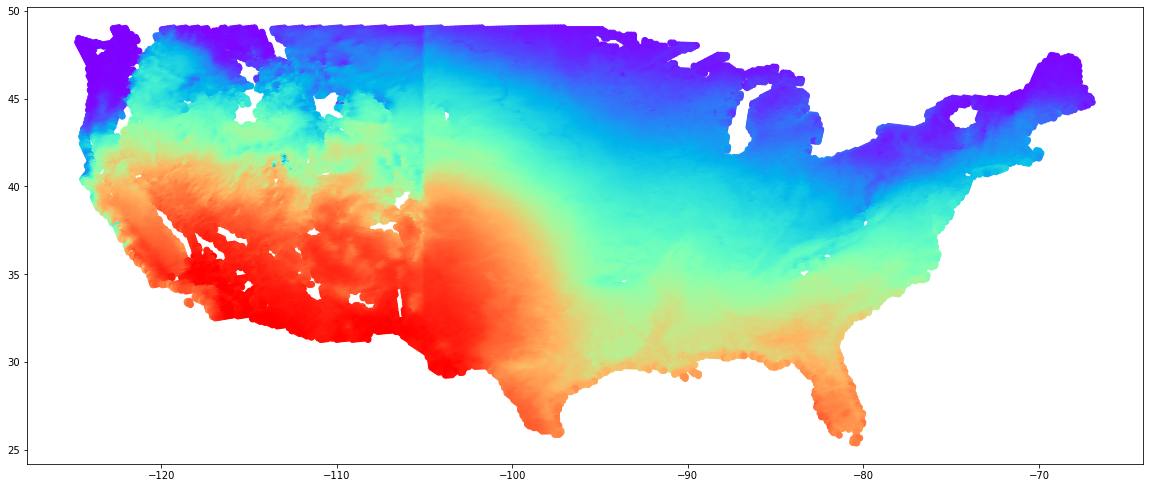

In [8]:
ax = gdf.plot(figsize=(20, 20), column='global_hor', cmap='rainbow')

### Wind Gross Capacity Factor at 110m Hub Height

In [51]:
wind_table = geopandas.read_file('110m_near_future/110_Meter_Hub_Height_Near_Future_Technology_.shp')

In [52]:
wind_table

LATITUDE  LONGITUDE       STATE  REGION  AREA WITH   AREA WI_01  \
0       48.3631  -119.3485  Washington    West       30.57       20.44   
1       47.9232  -121.4517  Washington    West        0.03        0.03   
2       47.4343  -123.5047  Washington    West        4.52        3.98   
3       48.8966  -123.1409  Washington    West       13.13       12.92   
4       47.6232  -122.7409  Washington    West       57.65       28.25   
...         ...        ...         ...     ...         ...         ...   
21543   26.2027   -98.4593       Texas  Plains        0.82        0.82   
21544   26.0266   -98.1363       Texas  Plains       21.43       21.43   
21545   26.3660   -98.6151       Texas  Plains      149.61      149.61   
21546   26.3774   -98.7845       Texas  Plains       84.53       84.53   
21547   26.2144   -98.6281       Texas  Plains        3.01        3.01   

       AREA WI_02  AREA (KM^2  \
0           10.60  420.252008   
1            0.03  733.111571   
2            2.95  632.391386   
3            0.00    9.936960   
4            5.57  326.908299   
...           ...         ...   
21543        0.82  138.727128   
21544       21.43   85.527186   
21545      149.61  285.757154   
21546       84.53  218.068266   
21547        3.01   78.506192   

                                                geometry  
0      POLYGON ((-119.25220 48.47656, -119.17886 48.3...  
1      POLYGON ((-121.40695 47.83655, -121.53621 47.8...  
2      POLYGON ((-123.33263 47.38107, -123.58215 47.3...  
3      POLYGON ((-123.04761 49.00212, -123.03339 48.9...  
4      MULTIPOLYGON (((-122.65686 47.73984, -122.6564...  
...                                                  ...  
21543  POLYGON ((-98.36839 26.27217, -98.37836 26.157...  
21544  POLYGON ((-98.04535 26.09543, -98.05005 26.044...  
21545  POLYGON ((-98.52418 26.43588, -98.53677 26.284...  
21546  POLYGON ((-98.69370 26.44751, -98.70585 26.296...  
21547  POLYGON ((-98.53747 26.28412, -98.54130 26.237...  

[21548 rows x 9 columns]

<AxesSubplot:>

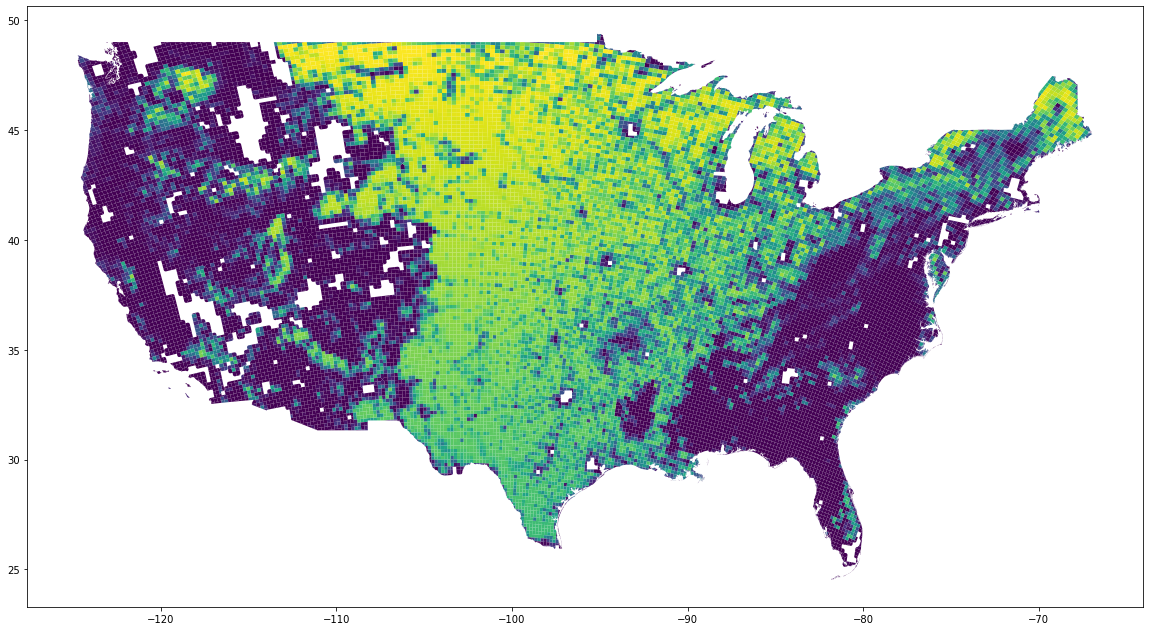

In [53]:
wind_table.plot(column='AREA WI_02', figsize=(20,20))

In [54]:
wind_table['geometry'] = wind_table['geometry'].centroid # convert polygons into points for later combination with other data

/tmp/ipykernel_827/432759262.py:1: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  wind_table['geometry'] = wind_table['geometry'].centroid # convert polygons into points for later combination with other data


<AxesSubplot:>

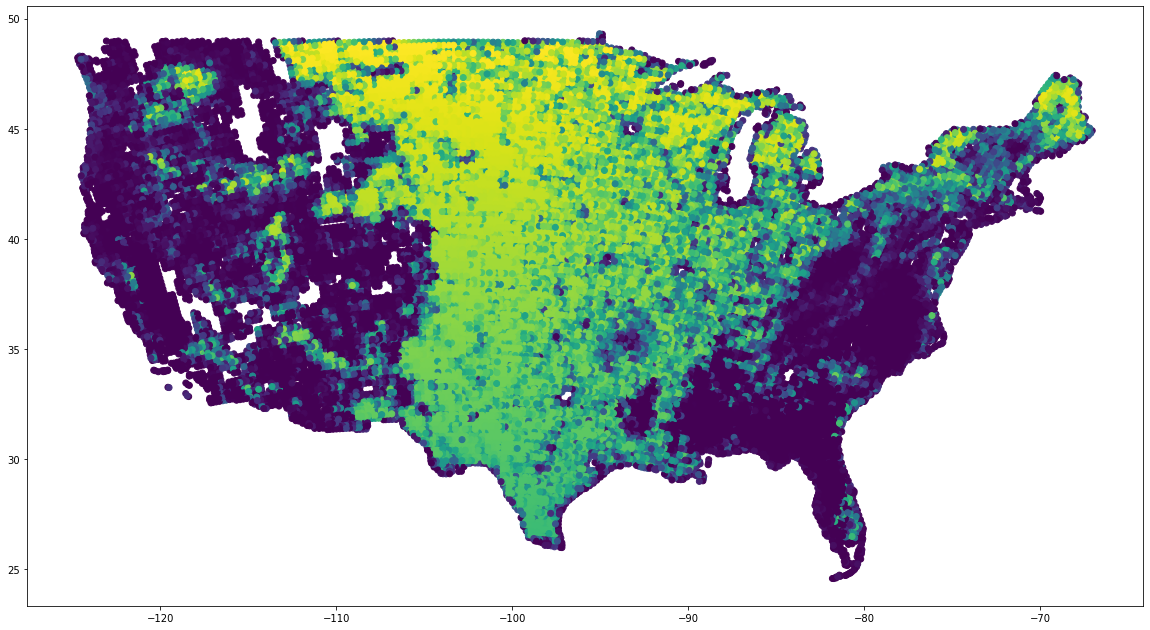

In [55]:
wind_table.plot(column='AREA WI_02', figsize=(20,20)) # make sure centroid calculation worked

In [56]:
wind_table.rename(columns={'AREA WITH ':'GCF > 30', 'AREA WI_01':'GCF > 35', 'AREA WI_02':'GCF > 40'}, inplace=True)
wind_table = wind_table[['GCF > 30', 'GCF > 35', 'GCF > 40', 'geometry']]
wind_table.to_file('wind_data_processed')

### Electricity Prices by State

In [60]:
# pull out the electricity prices file and add it to a geodataframe
elec = geopandas.read_file('Electricity prices by state.csv')

# next, we find the average electricity prices for each state.
elec['Sales (Megawatthours)'] = elec['Sales (Megawatthours)'].str.replace(",", "") # replace the commas in the numbers so they can be converted to ints
elec['Revenues (Thousands Dollars)'] = elec['Revenues (Thousands Dollars)'].str.replace(",", "") # replace the commas in the numbers so they can be converted to ints

elec['Sales (Megawatthours)'] = pandas.to_numeric(elec['Sales (Megawatthours)']) # convert strings to ints
elec['Revenues (Thousands Dollars)'] = pandas.to_numeric(elec['Revenues (Thousands Dollars)']) # convert strings to ints

elec = elec[['State', 'Sales (Megawatthours)', 'Revenues (Thousands Dollars)', 'geometry']] # trim away the unneeded columns
elec = elec.dissolve(by='State', aggfunc='sum') # consolidate rows 

elec['Avg price ($/kwh)'] = elec['Revenues (Thousands Dollars)'] / elec['Sales (Megawatthours)']
elec

geometry  Sales (Megawatthours)  Revenues (Thousands Dollars)  \
State                                                                 
AK        None                5969339                     1195131.9   
AL        None               85567957                     8711742.6   
AR        None               48628044                     4428014.4   
AZ        None               81133233                     8702605.4   
CA        None              170506603                    32843481.1   
CO        None               56170647                     6126161.0   
CT        None               14629759                     2889136.3   
DC        None                3056792                      386969.2   
DE        None                7375890                      866762.8   
FL        None              241553295                    25762842.4   
GA        None              137351913                    14332158.0   
HI        None                8884042                     2700875.9   
IA        None               52804082                     4822268.6   
ID        None               25285616                     2065218.1   
IL        None               51969512                     6279084.8   
IN        None               99735795                    10331088.2   
KS        None               40489279                     4241251.4   
KY        None               74388446                     6789899.9   
LA        None               90819346                     8007772.7   
MA        None               17784051                     3322073.8   
MD        None               30771800                     3845948.6   
ME        None                6424326                     1009951.7   
MI        None               90795892                    12261981.1   
MN        None               65778780                     7330078.1   
MO        None               77763041                     7660799.3   
MS        None               48015364                     4563056.1   
MT        None               12115692                     1275869.6   
NC        None              135541549                    12602282.0   
ND        None               22863107                     1977346.3   
NE        None               32336908                     2857699.2   
NH        None                5772903                     1063834.6   
NJ        None               41750952                     6239398.9   
NM        None               25377635                     2485545.3   
NV        None               34233038                     3083107.8   
NY        None               74746349                    13757448.8   
OH        None               43611635                     5155996.3   
OK        None               64525137                     5495412.2   
OR        None               51186607                     4652962.7   
PA        None               53960126                     6670553.2   
RI        None                4094803                      809824.4   
SC        None               79792136                     7947387.0   
SD        None               13041391                     1360062.5   
TN        None               99569394                     9734693.1   
TX        None              427986204                    39392544.7   
UT        None               32675058                     2726269.9   
VA        None              117126934                    10895878.2   
VT        None                5406958                      883743.5   
WA        None               85952424                     7571513.3   
WI        None               69426615                     7645276.8   
WV        None               32777988                     2907283.2   
WY        None               15784712                     1301688.4   

       Avg price ($/kwh)  
State                     
AK              0.200212  
AL              0.101811  
AR              0.091059  
AZ              0.107263  
CA              0.192623  
CO              0.109063  
CT              0.197484  

In [61]:
# In this cell, the state boundary geometry is pulled from file and pared down to the contiguous 48 states.
state_boundaries = geopandas.read_file('states_boundaries/cb_2018_us_state_500k.shp')
state_boundaries = state_boundaries[state_boundaries['NAME'] != 'Alaska']
state_boundaries = state_boundaries[state_boundaries['NAME'] != 'Puerto Rico']
state_boundaries = state_boundaries[state_boundaries['NAME'] != 'Hawaii']
state_boundaries = state_boundaries[state_boundaries['NAME'] != 'American Samoa']
state_boundaries = state_boundaries[state_boundaries['NAME'] != 'United States Virgin Islands']
state_boundaries = state_boundaries[state_boundaries['NAME'] != 'Commonwealth of the Northern Mariana Islands']
state_boundaries = state_boundaries[state_boundaries['NAME'] != 'Guam']

# state_boundaries.plot(figsize=(20,20)) # check to make sure it looks good

state_boundaries = state_boundaries[['STUSPS', 'geometry']]
state_boundaries.rename(columns={'STUSPS': 'State'}, inplace=True)
state_boundaries # review the data

State                                           geometry
0     MS  MULTIPOLYGON (((-88.50297 30.21523, -88.49176 ...
1     NC  MULTIPOLYGON (((-75.72681 35.93584, -75.71827 ...
2     OK  POLYGON ((-103.00257 36.52659, -103.00219 36.6...
3     VA  MULTIPOLYGON (((-75.74241 37.80835, -75.74151 ...
4     WV  POLYGON ((-82.64320 38.16909, -82.64300 38.169...
5     LA  MULTIPOLYGON (((-88.86770 29.86155, -88.86566 ...
6     MI  MULTIPOLYGON (((-83.19159 42.03537, -83.18993 ...
7     MA  MULTIPOLYGON (((-70.23405 41.28565, -70.22361 ...
8     ID  POLYGON ((-117.24267 44.39655, -117.23484 44.3...
9     FL  MULTIPOLYGON (((-80.17628 25.52505, -80.17395 ...
10    NE  POLYGON ((-104.05342 41.17054, -104.05324 41.1...
11    WA  MULTIPOLYGON (((-122.57039 48.53785, -122.5686...
12    NM  POLYGON ((-109.05017 31.48000, -109.04984 31.4...
14    SD  POLYGON ((-104.05788 44.99761, -104.05078 44.9...
15    TX  MULTIPOLYGON (((-94.71830 29.72885, -94.71721 ...
16    CA  MULTIPOLYGON (((-118.60442 33.47855, -118.5987...
17    AL  MULTIPOLYGON (((-88.05338 30.50699, -88.05109 ...
18    GA  MULTIPOLYGON (((-81.27939 31.30792, -81.27716 ...
19    PA  POLYGON ((-80.51989 40.90666, -80.51909 40.921...
20    MO  POLYGON ((-95.77355 40.57820, -95.76853 40.583...
21    CO  POLYGON ((-109.06025 38.59933, -109.05954 38.7...
22    UT  POLYGON ((-114.05296 37.59278, -114.05247 37.6...
23    TN  POLYGON ((-90.31030 35.00429, -90.30988 35.009...
24    WY  POLYGON ((-111.05456 45.00095, -111.04507 45.0...
25    NY  MULTIPOLYGON (((-72.03683 41.24984, -72.03496 ...
26    KS  POLYGON ((-102.05174 40.00308, -101.91670 40.0...
28    NV  POLYGON ((-120.00574 39.22866, -120.00559 39.2...
29    IL  POLYGON ((-91.51297 40.18106, -91.51107 40.188...
30    VT  POLYGON ((-73.43774 44.04501, -73.43199 44.063...
31    MT  POLYGON ((-116.04914 48.50205, -116.04913 48.5...
32    IA  POLYGON ((-96.63970 42.73707, -96.63589 42.741...
33    SC  MULTIPOLYGON (((-79.50795 33.02008, -79.50713 ...
34    NH  MULTIPOLYGON (((-70.61702 42.97718, -70.61529 ...
35    AZ  POLYGON ((-114.81629 32.50804, -114.81432 32.5...
36    DC  POLYGON ((-77.11976 38.93434, -77.11253 38.940...
39    NJ  POLYGON ((-75.55910 39.62906, -75.55945 39.629...
40    MD  MULTIPOLYGON (((-76.05015 37.98691, -76.04998 ...
41    ME  MULTIPOLYGON (((-67.35580 44.64226, -67.35437 ...
43    DE  MULTIPOLYGON (((-75.56555 39.51485, -75.56174 ...
46    RI  MULTIPOLYGON (((-71.28802 41.64558, -71.28647 ...
47    KY  MULTIPOLYGON (((-89.40565 36.52817, -89.39869 ...
48    OH  MULTIPOLYGON (((-82.73571 41.60336, -82.73392 ...
49    WI  MULTIPOLYGON (((-86.95617 45.35549, -86.95463 ...
50    OR  MULTIPOLYGON (((-123.59892 46.25145, -123.5984...
51    ND  POLYGON ((-104.04868 48.86378, -104.04865 48.8...
52    AR  POLYGON ((-94.61783 36.49941, -94.61765 36.499...
53    IN  POLYGON ((-88.09776 37.90403, -88.09448 37.905...
54    MN  MULTIPOLYGON (((-89.59206 47.96668, -89.59147 ...
55    CT  MULTIPOLYGON (((-72.76143 41.24233, -72.75973 ...

<AxesSubplot:>

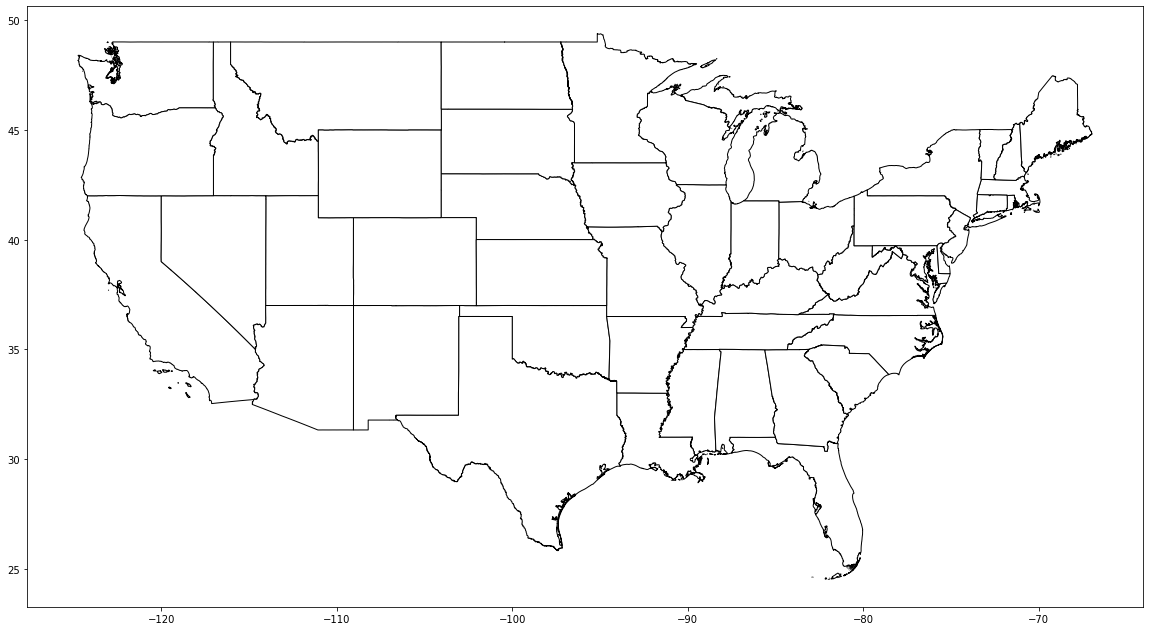

In [96]:
state_boundaries.plot(figsize=(20, 20), color='white', edgecolor='black')

In [69]:
# Now, we attach the state geometries to the electricity prices table.
elec_and_geo = elec.merge(state_boundaries, on='State', how='inner')
elec_and_geo.rename(columns={'geometry_y': 'geometry'}, inplace=True)
elec_and_geo = elec_and_geo[['State', 'Sales (Megawatthours)', 'Revenues (Thousands Dollars)', 'Avg price ($/kwh)', 'geometry']]
elecGdf = geopandas.GeoDataFrame(elec_and_geo)
elecGdf.to_crs("EPSG:4326", inplace=True)
#type(elec_and_geo.loc[1, 'geometry'])


### Compile the data in one table for analysis

107136


<AxesSubplot:>

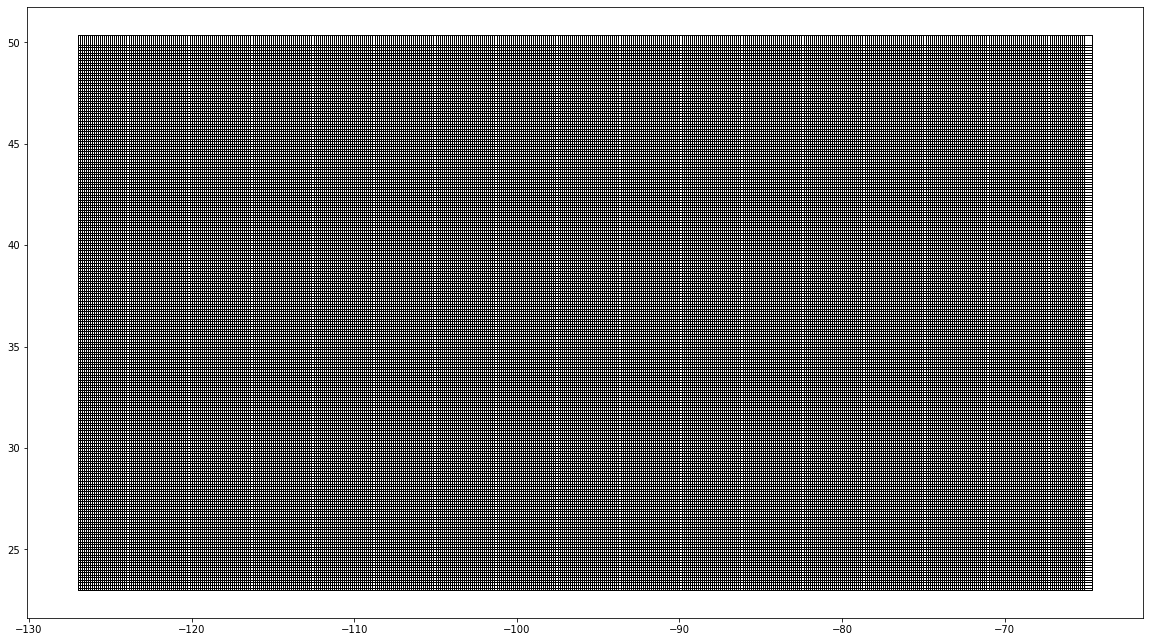

In [75]:
# Below, I am manually creating a raster of rectangles across the contiguous United States. The points from each dataset will be tested to
#      see which pixel they intersect with, then will be added to that row (and averaged if necessary).
min_x = -127
max_x = -65
min_y = 23
max_y = 50

numRastersPerDegree = 8

shapes = {'geometry':[]}
for x in range(min_x * numRastersPerDegree, max_x * numRastersPerDegree): # step along horizontally by 0.25 degree increments
    lon = x/numRastersPerDegree
    for y in range(min_y * numRastersPerDegree, max_y * numRastersPerDegree):
        lat = y/numRastersPerDegree
        # Define the vertices of the polygon in counterclockwise order
        vertices = [(lon, lat), (lon+0.5, lat), (lon+0.5, lat+0.5), (lon, lat+0.5)]
        polygon = shapely.geometry.Polygon(vertices)
        #print(polygon)
        shapes['geometry'].append(polygon)
        
print(len(shapes['geometry']))
manual_raster = geopandas.GeoDataFrame(shapes, crs="EPSG:4326")
manual_raster.plot(figsize=(20,20), color = 'white', edgecolor='black')

In [76]:
# perform a spatial join to get the points contained by the same raster polygon to
#     be ready to be averaged together.
landValueGdf = geopandas.read_file('land_values_trimmed/land_values_trimmed.shp')
compiledData1 = manual_raster.sjoin(landValueGdf, how='inner', predicate='contains')
compiledData1 = compiledData1[['geometry', 'land_value']]
compiledData1
#compiledData1.loc[6471]

geometry  land_value
3436    POLYGON ((-125.12500 47.50000, -124.62500 47.5...    9.962386
3437    POLYGON ((-125.12500 47.62500, -124.62500 47.6...    9.962386
3438    POLYGON ((-125.12500 47.75000, -124.62500 47.7...    9.962386
3439    POLYGON ((-125.12500 47.87500, -124.62500 47.8...    9.962386
3652    POLYGON ((-125.00000 47.50000, -124.50000 47.5...    9.962386
...                                                   ...         ...
103638  POLYGON ((-67.12500 44.75000, -66.62500 44.750...   10.044805
103851  POLYGON ((-67.00000 44.37500, -66.50000 44.375...   10.044805
103852  POLYGON ((-67.00000 44.50000, -66.50000 44.500...   10.044805
103853  POLYGON ((-67.00000 44.62500, -66.50000 44.625...   10.044805
103854  POLYGON ((-67.00000 44.75000, -66.50000 44.750...   10.044805

[4792160 rows x 2 columns]

In [77]:
compiledData1 = compiledData1.dissolve(by=compiledData1.index, aggfunc='mean') # consolidate rows

In [78]:
compiledData1

geometry  land_value
3436    POLYGON ((-125.12500 47.50000, -125.12500 48.0...    9.541891
3437    POLYGON ((-125.12500 47.62500, -125.12500 48.1...    9.393612
3438    POLYGON ((-124.62500 48.25000, -124.62500 47.7...    9.154871
3439    POLYGON ((-124.62500 48.37500, -124.62500 47.8...    9.177755
3440    POLYGON ((-124.62500 48.50000, -124.62500 48.0...    9.073716
...                                                   ...         ...
103640  POLYGON ((-67.12500 45.00000, -66.62500 45.000...    9.332131
103851  POLYGON ((-67.00000 44.37500, -67.00000 44.875...    9.547007
103852  POLYGON ((-67.00000 44.50000, -67.00000 45.000...    9.547007
103853  POLYGON ((-67.00000 44.62500, -67.00000 45.125...    9.547007
103854  POLYGON ((-67.00000 44.75000, -67.00000 45.250...    9.547007

[56362 rows x 2 columns]

<AxesSubplot:>

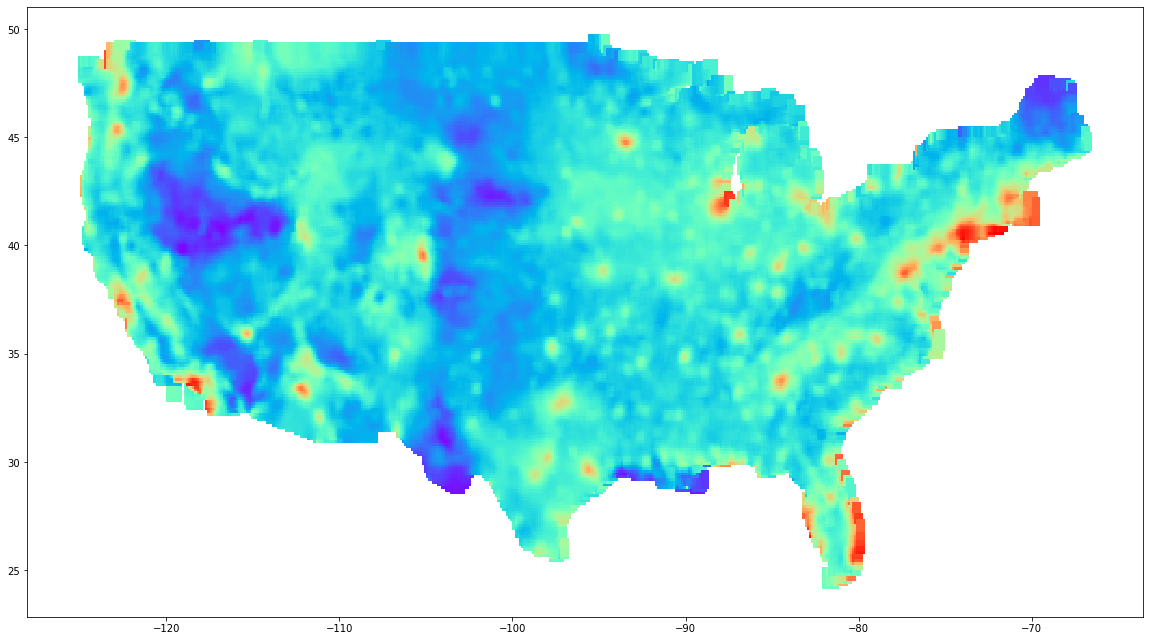

In [79]:
# plotting the geodataframe shows that so far, we have successfully mapped point data from the land values table
#     onto the empty raster grid I created.
compiledData1.plot(figsize=(20, 20), column='land_value', cmap='rainbow')

In [80]:
compiledData1.to_file('compiledData1')

In [82]:
# Next, we will add global horizontal irradiance to the table.

solarGdf = geopandas.read_file('USA_GHI/USA_GHI.shp') # get from file
solarGdf.rename(columns={'global_hor': 'GHI'}, inplace=True)
solarGdf = solarGdf[['GHI', 'geometry']] # exclude unneeded columns
solarGdf['GHI'] = pandas.to_numeric(solarGdf['GHI']) # convert strings to ints

compiledData1 = geopandas.read_file('compiledData1/compiledData1.shp')

# perform a spatial join to get the points contained by my the same anual raster polygons to
#     be ready to be averaged together.
compiledData2 = compiledData1.sjoin(solarGdf, how='left', predicate='contains')
compiledData2 = compiledData2[['geometry', 'land_value', 'GHI']]
compiledData2 = compiledData2.dissolve(by=compiledData2.index, aggfunc='mean') # consolidate rows with the same geometry
compiledData2

/cvmfs/cybergis.illinois.edu/software/conda/cybergisx/python3-0.9.0/lib/python3.8/site-packages/geopandas/geodataframe.py:1938: UserWarning: CRS mismatch between the CRS of left geometries and the CRS of right geometries.
Use `to_crs()` to reproject one of the input geometries to match the CRS of the other.

Left CRS: EPSG:4326
Right CRS: None

  return geopandas.sjoin(left_df=self, right_df=df, *args, **kwargs)


geometry  land_value       GHI
0      POLYGON ((-125.12500 47.50000, -125.12500 48.0...    9.541891       NaN
1      POLYGON ((-125.12500 47.62500, -125.12500 48.1...    9.393612  3.148024
2      POLYGON ((-124.62500 47.75000, -125.12500 47.7...    9.154871  3.158121
3      POLYGON ((-125.12500 47.87500, -125.12500 48.3...    9.177755  3.160838
4      POLYGON ((-125.12500 48.00000, -125.12500 48.5...    9.073716  3.163271
...                                                  ...         ...       ...
56357  POLYGON ((-67.12500 45.00000, -67.12500 45.500...    9.332131  3.752100
56358  POLYGON ((-67.00000 44.37500, -67.00000 44.875...    9.547007  3.727710
56359  POLYGON ((-67.00000 44.50000, -67.00000 45.000...    9.547007  3.727710
56360  POLYGON ((-67.00000 44.62500, -67.00000 45.125...    9.547007  3.727710
56361  POLYGON ((-67.00000 44.75000, -67.00000 45.250...    9.547007  3.727710

[56362 rows x 3 columns]

<AxesSubplot:>

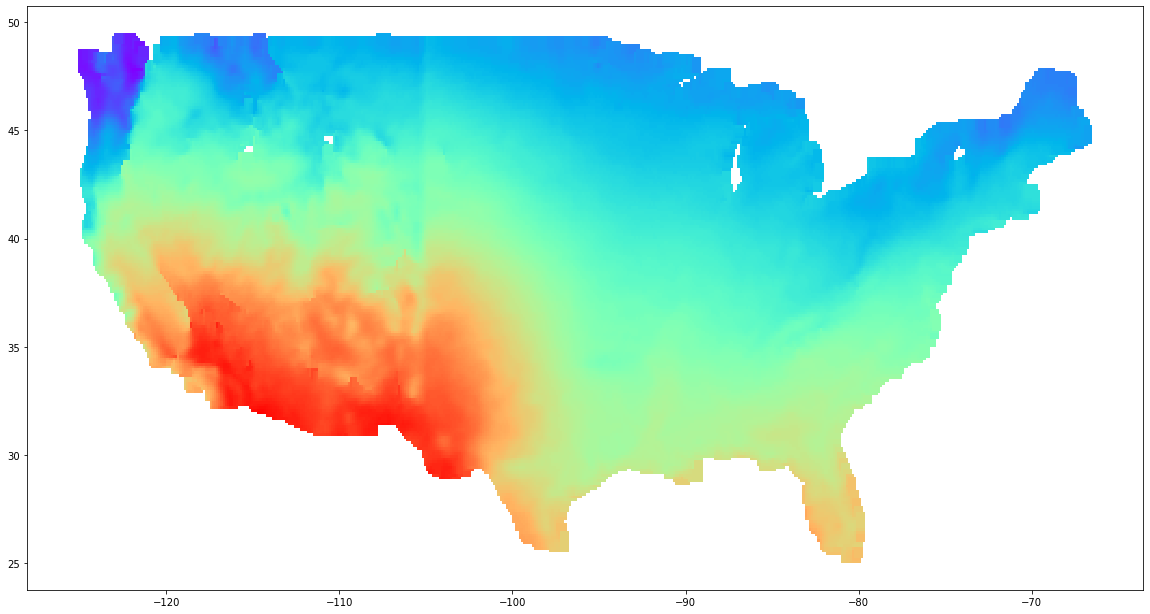

In [83]:
# plotting the geodataframe shows that we have successfully mapped point data from the solar table
#     onto the empty raster grid I created.
compiledData2.plot(figsize=(20, 20), column='GHI', cmap='rainbow')

In [84]:
compiledData2.to_file('compiledData2')

In [85]:
# Next, we do the same thing for wind.

windGdf = geopandas.read_file('wind_data_processed/wind_data_processed.shp') # get from file
#solarGdf['GHI'] = pandas.to_numeric(solarGdf['GHI']) # convert strings to ints

compiledData2 = geopandas.read_file('compiledData2/compiledData2.shp')

# perform a spatial join to get the points contained by my the same anual raster polygons to
#     be ready to be averaged together.
compiledData3 = compiledData2.sjoin(windGdf, how='left', predicate='contains')
compiledData3 = compiledData3[['geometry', 'land_value', 'GHI', 'GCF > 30', 'GCF > 35', 'GCF > 40']]
compiledData3 = compiledData3.dissolve(by=compiledData3.index, aggfunc='mean') # consolidate rows with the same geometry
compiledData3

geometry  land_value  \
0      POLYGON ((-125.12500 47.50000, -125.12500 48.0...    9.541891   
1      POLYGON ((-125.12500 47.62500, -125.12500 48.1...    9.393612   
2      POLYGON ((-125.12500 47.75000, -125.12500 48.2...    9.154871   
3      POLYGON ((-125.12500 48.37500, -124.62500 48.3...    9.177755   
4      POLYGON ((-125.12500 48.50000, -124.62500 48.5...    9.073716   
...                                                  ...         ...   
56357  POLYGON ((-67.12500 45.00000, -67.12500 45.500...    9.332131   
56358  POLYGON ((-67.00000 44.37500, -67.00000 44.875...    9.547007   
56359  POLYGON ((-67.00000 44.50000, -67.00000 45.000...    9.547007   
56360  POLYGON ((-67.00000 44.62500, -67.00000 45.125...    9.547007   
56361  POLYGON ((-67.00000 44.75000, -67.00000 45.250...    9.547007   

            GHI  GCF > 30  GCF > 35  GCF > 40  
0           NaN       NaN       NaN       NaN  
1      3.148024      2.54      2.54     1.360  
2      3.158121      1.55      1.55     0.775  
3      3.160838      1.55      1.55     0.775  
4      3.163271      1.55      1.55     0.775  
...         ...       ...       ...       ...  
56357  3.752100       NaN       NaN       NaN  
56358  3.727710       NaN       NaN       NaN  
56359  3.727710       NaN       NaN       NaN  
56360  3.727710       NaN       NaN       NaN  
56361  3.727710       NaN       NaN       NaN  

[56362 rows x 6 columns]

<AxesSubplot:>

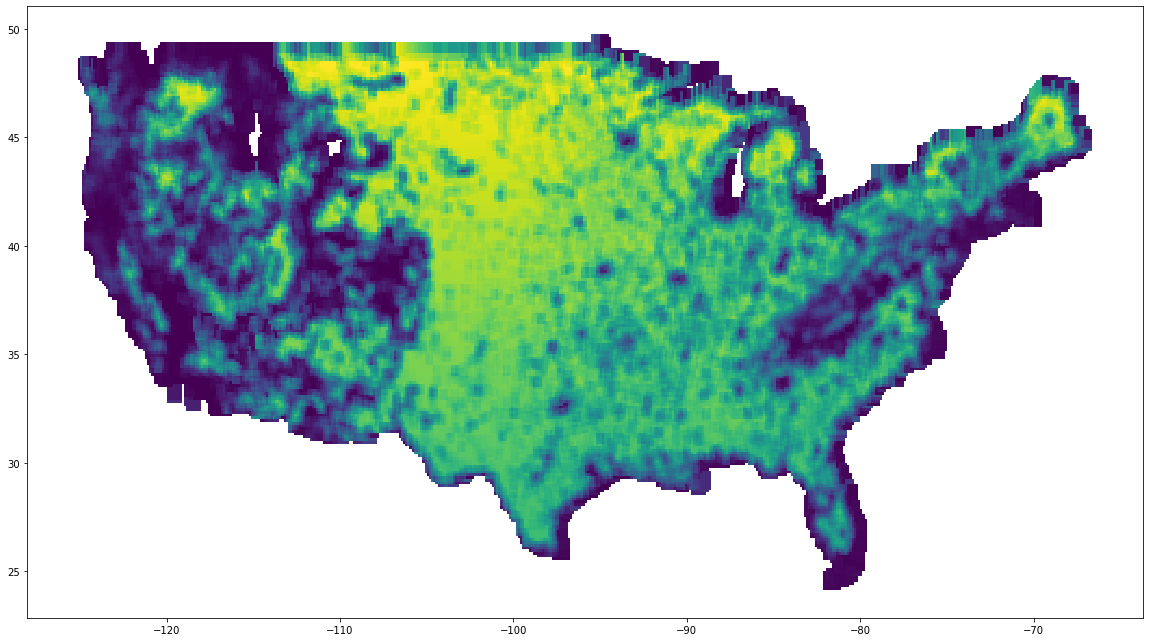

In [86]:
compiledData3.plot(column='GCF > 30', figsize=(20, 20))

In [87]:
compiledData3.to_file('compiledData3')

In [91]:
# Next, we add in electricity prices by state, performing a spatial join to map electricity prices onto pixels.
compiledData3 = geopandas.read_file('compiledData3/compiledData3.shp')
compiledData4 = elecGdf.sjoin(compiledData3, how='right', predicate='intersects')
compiledData4.rename(columns={'Sales (Megawatthours)': 'Sales (mwh)', 'Revenues (Thousands Dollars)': 'Revenue k$', 'Avg price ($/kwh)':'Price$/kwh'}, inplace=True)
compiledData4.dissolve(by=compiledData4.index, aggfunc='mean')
compiledData4


index_left State  Sales (mwh)  Revenue k$  Price$/kwh  land_value  \
0            45.0    WA   85952424.0   7571513.3    0.088090    9.541891   
1            45.0    WA   85952424.0   7571513.3    0.088090    9.393612   
2            45.0    WA   85952424.0   7571513.3    0.088090    9.154871   
3            45.0    WA   85952424.0   7571513.3    0.088090    9.177755   
4            45.0    WA   85952424.0   7571513.3    0.088090    9.073716   
...           ...   ...          ...         ...         ...         ...   
56357        19.0    ME    6424326.0   1009951.7    0.157207    9.332131   
56358        19.0    ME    6424326.0   1009951.7    0.157207    9.547007   
56359        19.0    ME    6424326.0   1009951.7    0.157207    9.547007   
56360        19.0    ME    6424326.0   1009951.7    0.157207    9.547007   
56361        19.0    ME    6424326.0   1009951.7    0.157207    9.547007   

            GHI  GCF > 30  GCF > 35  GCF > 40  \
0           NaN       NaN       NaN       NaN   
1      3.148024      2.54      2.54     1.360   
2      3.158121      1.55      1.55     0.775   
3      3.160838      1.55      1.55     0.775   
4      3.163271      1.55      1.55     0.775   
...         ...       ...       ...       ...   
56357  3.752100       NaN       NaN       NaN   
56358  3.727710       NaN       NaN       NaN   
56359  3.727710       NaN       NaN       NaN   
56360  3.727710       NaN       NaN       NaN   
56361  3.727710       NaN       NaN       NaN   

                                                geometry  
0      POLYGON ((-125.12500 47.50000, -125.12500 48.0...  
1      POLYGON ((-125.12500 47.62500, -125.12500 48.1...  
2      POLYGON ((-125.12500 47.75000, -125.12500 48.2...  
3      POLYGON ((-125.12500 48.37500, -124.62500 48.3...  
4      POLYGON ((-125.12500 48.50000, -124.62500 48.5...  
...                                                  ...  
56357  POLYGON ((-67.12500 45.00000, -67.12500 45.500...  
56358  POLYGON ((-67.00000 44.37500, -67.00000 44.875...  
56359  POLYGON ((-67.00000 44.50000, -67.00000 45.000...  
56360  POLYGON ((-67.00000 44.62500, -67.00000 45.125...  
56361  POLYGON ((-67.00000 44.75000, -67.00000 45.250...  

[70103 rows x 11 columns]

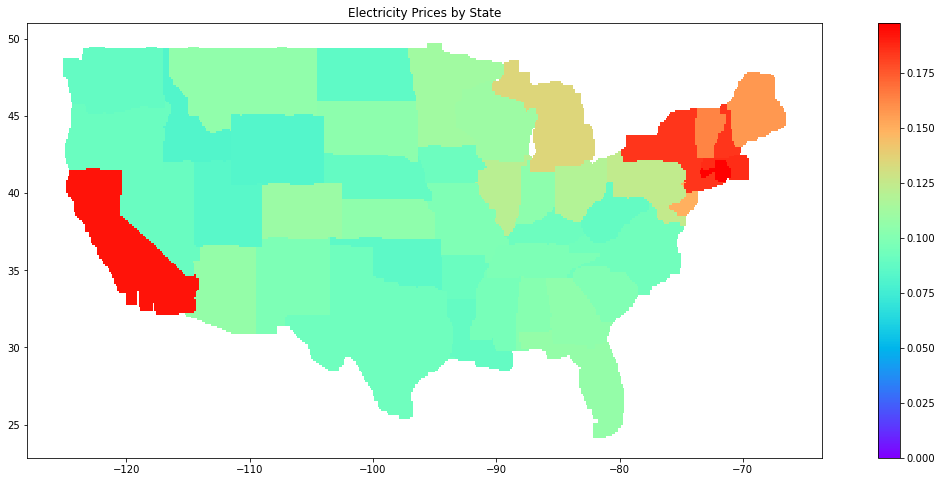

In [125]:
compiledData4.plot(figsize=(20,8), cmap='rainbow', column='Price$/kwh', vmin=0, legend=True)
matplotlib.pyplot.title('Electricity Prices by State')
matplotlib.pyplot.show()

In [94]:
# Now we pare down the columns to only include the ones that are relevant for analysis.
compiledData5 = compiledData4[['State', 'Price$/kwh', 'land_value', 'GHI', 'GCF > 30', 'GCF > 35', 'GCF > 40', 'geometry']]
compiledData5.to_file('compiledData5')

### Perform analysis by calculating additional metrics

In [108]:
# Pull data from file
compiledData5 = geopandas.read_file('compiledData5/compiledData5.shp')

# Finally, we can perform analysis! The first metric we will calculate is solar energy viability by location.
#     Each raster has global horizontal irradiance, land value, and electricity prices associated with it.
#     High GHI and high electricity prices are good, while high land prices are bad. Hence the following math:
compiledData5['Solar!'] = compiledData5['GHI'] * compiledData5['Price$/kwh'] / compiledData5['land_value']

# We can also calculate a wind viability metric. Since wind requires so much less land than solar, land values
#     are discounted and the only components of the analysis are capacity factor and electricity prices.
compiledData5['Wind!'] = compiledData5['GCF > 30'] * compiledData5['Price$/kwh']

# Finally, we can generate a column that combines these metrics. This column takes into account electricity
#     prices, wind capacity factor, insolation, and land value all in the same metric.
compiledData5['Combined!'] = compiledData5['GHI'] * compiledData5['Price$/kwh'] * compiledData5['GCF > 30'] / compiledData5['land_value']

In [123]:
compiledData5.describe()

Price$/kwh    land_value           GHI      GCF > 30      GCF > 35  \
count  70102.000000  70103.000000  68988.000000  69065.000000  69065.000000   
mean       0.107499      8.785540      4.560724    210.214590    190.804506   
std        0.028651      1.118322      0.603958    120.009110    128.958107   
min        0.081676      5.723633      3.066825      0.000000      0.000000   
25%        0.090902      8.103961      4.058840    102.938571     60.628333   
50%        0.098515      8.711206      4.520310    236.492000    206.145000   
75%        0.109063      9.328278      4.951688    308.443333    305.378571   
max        0.197769     14.703334      6.081697    420.296667    420.296667   

           GCF > 40        Solar!         Wind!     Combined!  
count  69065.000000  68987.000000  69065.000000  68342.000000  
mean     165.343428      0.056408     21.753263     11.666250  
std      139.612741      0.018467     12.664006      6.955625  
min        0.000000      0.022608      0.000000      0.000000  
25%       18.647143      0.046202     10.879436      5.839724  
50%      149.725000      0.051739     24.012724     12.487782  
75%      301.728000      0.061154     30.730284     16.407792  
max      420.296667      0.187337     71.454188     46.280591

In [ ]:
compiledData5.to_file('compiledData5')

### Data Visualization

In [117]:
compiledData5 = geopandas.read_file('compiledData5/compiledData5.shp')

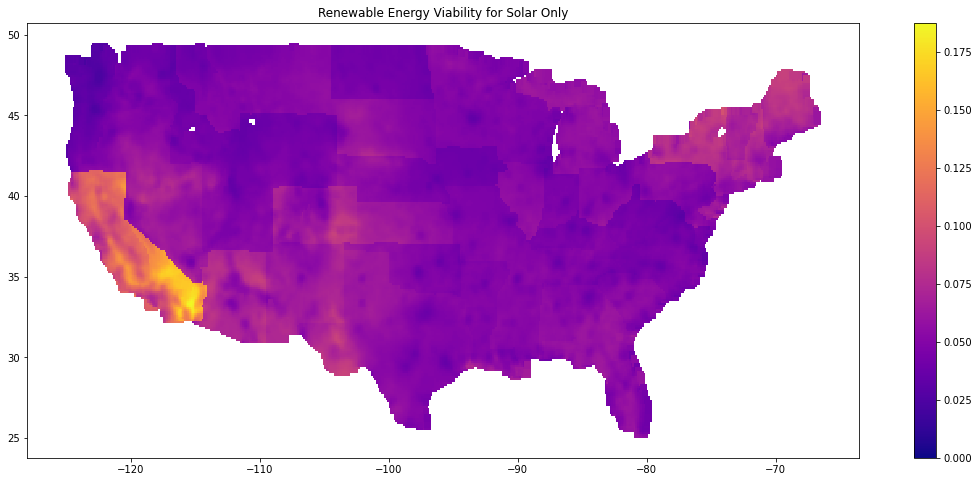

In [126]:
compiledData5.plot(figsize=(20, 8), cmap='plasma', column='Solar!', vmin=0, legend=True)
matplotlib.pyplot.title('Renewable Energy Viability for Solar Only')
matplotlib.pyplot.show()

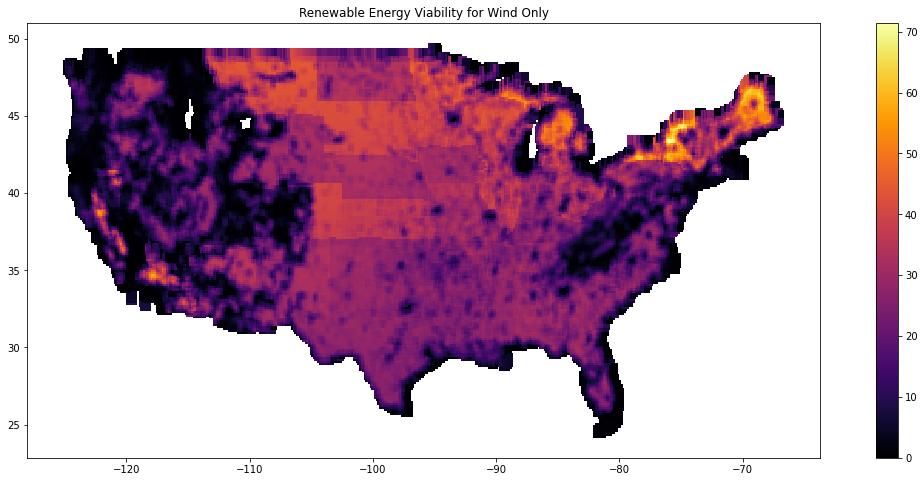

In [127]:
compiledData5.plot(figsize=(20, 8), cmap='inferno', column='Wind!', vmin=0, legend=True)
matplotlib.pyplot.title('Renewable Energy Viability for Wind Only')
matplotlib.pyplot.show()

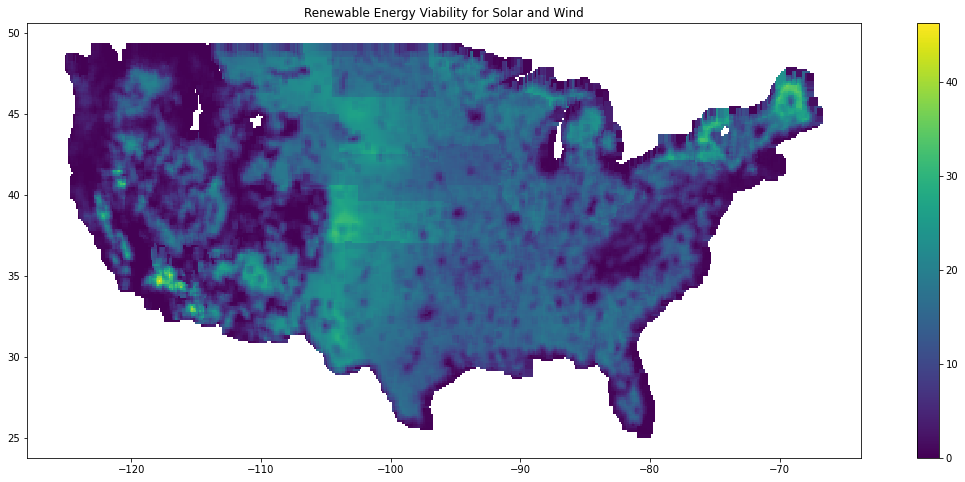

In [128]:
compiledData5.plot(figsize=(20, 8), cmap='viridis', column='Combined!', vmin=0, legend=True)
matplotlib.pyplot.title('Renewable Energy Viability for Solar and Wind')
matplotlib.pyplot.show()